In [2]:
import numpy as np
import openml
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
import tensorflow as tf
from scipy.io import arff
import pandas as pd


In [3]:
# PART 1
# cifar = datasets.fetch_openml('CIFAR_10', as_frame="False")
cifar = arff.loadarff('./cifar-10.arff')

In [4]:
# PART 2
X_0 = pd.DataFrame(cifar[0])
X_0_1=X_0.iloc[: , 1:3073]
y_0_1=X_0.iloc[:, 3072:3074].astype(int)
X_1_0, _, y_1_0, _ = train_test_split(X_0_1, y_0_1, train_size=19999, random_state=42)
X_1 = X_1_0.astype(float) / 255.0 
print(X_1.shape)
print(y_1_0.shape)


(19999, 3072)
(19999, 1)


In [5]:
# PART 2: EXTRA CREDIT
from skimage import transform
X_augmented = []
y_augmented = []
iter=0
for img, label in zip(X_1.values, y_1_0.values):
    # Flip horizontally
    flipped_img = np.fliplr(img.reshape(32, 32, 3)).flatten()
    X_augmented.append(flipped_img)
    y_augmented.append(label)

    # Rotate 90 degrees
    rotated_img = transform.rotate(img.reshape(32, 32, 3), angle=90, resize=False, mode='reflect')
    rotated_img = rotated_img.flatten()
    X_augmented.append(rotated_img)
    y_augmented.append(label)

X_augmented = np.array(X_augmented)
y_augmented = np.array(y_augmented)

# Combine original and augmented data
X = np.vstack((X_1, X_augmented))
y = np.concatenate((y_1_0, y_augmented))

In [6]:

# PART 2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(X_train.shape)
print(y_train.shape)

(47997, 3072)
(47997, 1)


In [7]:
pca = PCA(n_components=100)  # You can adjust the number of components based on your requirements
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train_pca.shape)
print(X_test_pca.shape)

(47997, 100)
(12000, 100)


In [8]:
# PART 4 LINEAR SVC

linear_svm = SVC(kernel='linear')
param_grid_linear = {'C': [1, 10, 100]}
grid_linear = GridSearchCV(linear_svm, param_grid_linear, cv=3, n_jobs=8)
grid_linear.fit(X_train_pca, y_train.ravel())

In [ ]:
# PART 4 RADIAL BASIS FUNc SVC

rbf_svm = SVC(kernel='rbf')
param_grid_rbf = {'C': [1, 10, 100], 'gamma': [1e-3, 1e-4]}
grid_rbf = GridSearchCV(rbf_svm, param_grid_rbf, cv=3, n_jobs=4)
grid_rbf.fit(X_train_pca, y_train.ravel())

GridSearchCV(cv=3, estimator=SVC(), n_jobs=4,
             param_grid={'C': [1, 10, 100], 'gamma': [0.001, 0.0001]})

In [ ]:
# Evaluate Linear SVM
y_pred_linear = grid_linear.predict(X_test_pca)
print(y_pred_linear)
print("Linear SVM Classification Report:")
print(classification_report(y_test.ravel(), y_pred_linear))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_linear))

# Evaluate RBF SVM
y_pred_rbf = grid_rbf.predict(X_test_pca)
print("RBF SVM Classification Report:")
print(classification_report(y_test.ravel(), y_pred_rbf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rbf))

[1 2 8 ... 9 9 3]
Linear SVM Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.47      0.45       413
           1       0.38      0.46      0.42       407
           2       0.26      0.25      0.25       433
           3       0.25      0.27      0.26       445
           4       0.35      0.29      0.32       430
           5       0.30      0.24      0.27       399
           6       0.38      0.45      0.41       420
           7       0.36      0.30      0.33       431
           8       0.47      0.49      0.48       431
           9       0.48      0.48      0.48       391

    accuracy                           0.37      4200
   macro avg       0.37      0.37      0.37      4200
weighted avg       0.37      0.37      0.36      4200

Confusion Matrix:
[[194  28  34  18   8   9   6  29  62  25]
 [ 18 188  19  30   6  21  20  14  37  54]
 [ 45  26 107  42  53  31  64  32  24   9]
 [ 23  53  26 120  29  74  59  22  24  15]

[1 2 8 ... 9 9 3]
[4 0 5 ... 8 9 4]


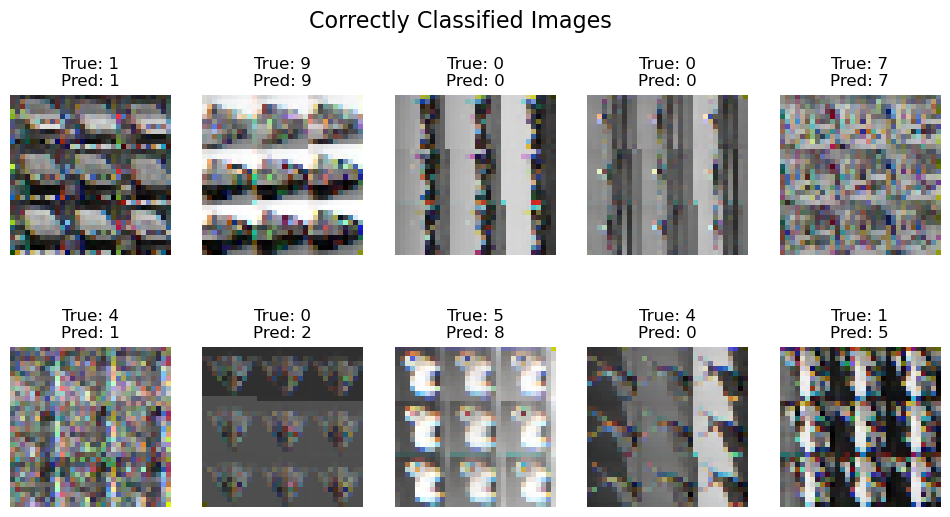

[6 2 8 ... 1 3 3]
[4 0 5 ... 8 9 4]


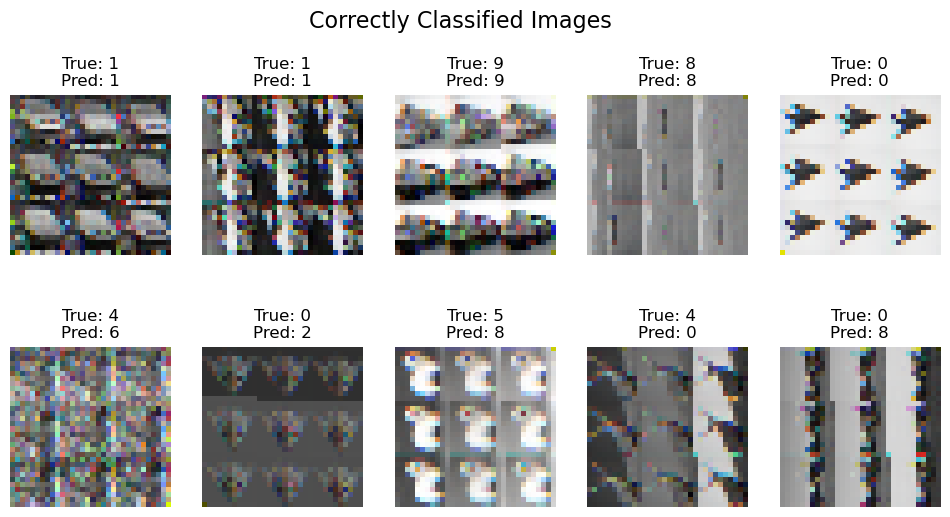

In [71]:
def visualize_results(model, X_test, y_test):
    y_pred = model.predict(X_test_pca)

    correct_indices = np.where(y_pred == y_test)[0]
    incorrect_indices = np.where(y_pred != y_test)[0]

    print(y_pred)
    print(y_test)
    # Visualize some correct predictions
    plt.figure(figsize=(12, 6))
    plt.suptitle('Correctly Classified Images', fontsize=16)
    for i, idx in enumerate(correct_indices[:5]):
        plt.subplot(2, 5, i + 1)
        plt.imshow(X_test[idx].reshape(32, 32, 3)*255,interpolation='nearest')
        plt.title(f'True: {y_test[idx]}\nPred: {y_pred[idx]}')
        plt.axis('off')

    # Visualize some incorrect predictions
    for i, idx in enumerate(incorrect_indices[:5]):
        plt.subplot(2, 5, i + 6)
        plt.imshow(X_test[idx].reshape(32, 32, 3)*255, interpolation='nearest')
        plt.title(f'True: {y_test[idx]}\nPred: {y_pred[idx]}')
        plt.axis('off')

    plt.show()

# Visualize results for linear SVM
visualize_results(grid_linear, X_test, y_test.ravel())

# Visualize results for RBF SVM
visualize_results(grid_rbf, X_test, y_test.ravel())